<a href="https://colab.research.google.com/github/ayushksingh28/Torch/blob/main/Torch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import torch

In [19]:
x = torch.empty(1)
print(x)

tensor([0.])


In [20]:
x = torch.rand(2,2,3,4)
print(x)

tensor([[[[0.1342, 0.1275, 0.5001, 0.2470],
          [0.8376, 0.5302, 0.2212, 0.6450],
          [0.1456, 0.2291, 0.3904, 0.9321]],

         [[0.9568, 0.5002, 0.4338, 0.6453],
          [0.4458, 0.1241, 0.6365, 0.5309],
          [0.5172, 0.5546, 0.3918, 0.3417]]],


        [[[0.6906, 0.6035, 0.3645, 0.8275],
          [0.3612, 0.3851, 0.7164, 0.7915],
          [0.7418, 0.7377, 0.4275, 0.0718]],

         [[0.5058, 0.9614, 0.0010, 0.8565],
          [0.8238, 0.4334, 0.2801, 0.9718],
          [0.7709, 0.1064, 0.1995, 0.8099]]]])


In [21]:
x = torch.ones(2,2, dtype = torch.int)
print(x.dtype)

torch.int32


In [22]:
pip install torchvision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
import torchvision
from torchvision import transforms, datasets

In [24]:
train = datasets.MNIST("", train = True, download = True,
                       transform = transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST("", train = False, download = True,
                      transform = transforms.Compose([transforms.ToTensor]))

In [25]:
trainset = torch.utils.data.DataLoader(train, batch_size = 10, shuffle = True)
testset = torch.utils.data.DataLoader(test, batch_size = 10, shuffle = True)

In [26]:
for data in trainset:
  print(data)
  break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [27]:
x, y = data[0][0], data[1][0]

In [28]:
print(y)

tensor(3)


In [29]:
data[0][0].shape

torch.Size([1, 28, 28])

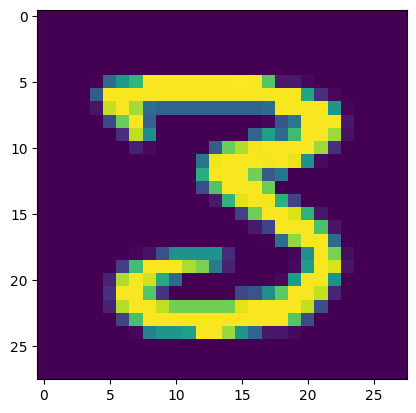

In [30]:
import matplotlib.pyplot as plt

plt.imshow(data[0][0].view(28, 28))

In [31]:
total = 0
counter_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}

for data in trainset:
  Xs, ys = data
  for y in ys:
    counter_dict[int(y)] +=1
    total +=1

print(counter_dict)

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [32]:
for i in counter_dict:
  print(f"{i}: {counter_dict[i]/total*100}")

0: 9.871666666666666
1: 11.236666666666666
2: 9.93
3: 10.218333333333334
4: 9.736666666666666
5: 9.035
6: 9.863333333333333
7: 10.441666666666666
8: 9.751666666666667
9: 9.915000000000001


In [33]:
import torch.nn as nn
import torch.nn.functional as F

In [35]:
class Net(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(28*28, 64)
    self.fc2 = nn.Linear(64, 64)
    self.fc3 = nn.Linear(64, 64)
    self.fc4 = nn.Linear(64, 10)



  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = self.fc4(x)

    return F.log_softmax(x, dim=1)



net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [36]:
X = torch.rand((28, 28))
X = X.view(-1, 28*28)

In [37]:
output = net(X)

In [38]:
output

tensor([[-2.2583, -2.2317, -2.4324, -2.2797, -2.3203, -2.4089, -2.2936, -2.1797,
         -2.2200, -2.4391]], grad_fn=<LogSoftmaxBackward0>)

In [43]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr = 0.001)

EPOCHS=3

for epoch in range(EPOCHS):
  for data in trainset:
    #data is a batch of featuresets and labels
    X, y = data
    net.zero_grad()
    output = net(X.view(-1, 28*28))
    loss = F.nll_loss(output, y)
    loss.backward()
    optimizer.step()
  print(loss)

tensor(0.1000, grad_fn=<NllLossBackward0>)
tensor(0.0031, grad_fn=<NllLossBackward0>)
tensor(0.4015, grad_fn=<NllLossBackward0>)


In [44]:
correct = 0
total = 0

with torch.no_grad():
  for data in trainset:
    X, y = data
    output = net(X.view(-1, 784))
    for idx, i in enumerate(output):
      if torch.argmax(i) == y[idx]:
        correct +=1
      total +=1

print("Accuracy: ", round(correct/total, 3))

Accuracy:  0.974


In [45]:
X

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

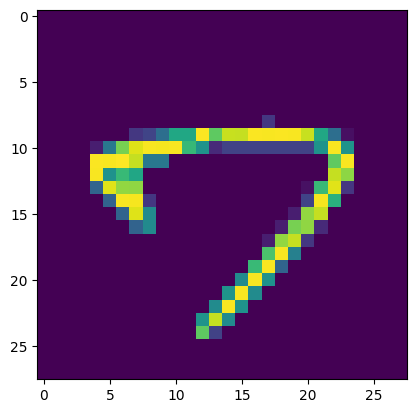

In [46]:
import matplotlib.pyplot as plt
plt.imshow(X[3].view(28, 28))
plt.show()

In [47]:
print(torch.argmax(net(X[3].view(-1, 784))[0]))

tensor(7)
